In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the API key.
from config import weather_api_key


In [3]:
#weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

76

In [7]:
cities

['pisco',
 'kodiak',
 'punta arenas',
 'kununurra',
 'guerrero negro',
 'arraial do cabo',
 'avarua',
 'kahului',
 'san rafael',
 'buncrana',
 'ushuaia',
 'dover',
 'castro',
 'saint-philippe',
 'bengkulu',
 'antofagasta',
 'rikitea',
 'nikolskoye',
 'dikson',
 'mataura',
 'wattegama',
 'belushya guba',
 'beringovskiy',
 'lakes entrance',
 'mount isa',
 'ribeira grande',
 'lazaro cardenas',
 'sitka',
 'tuatapere',
 'fort saint john',
 'mapiripan',
 'albany',
 'sinegorye',
 'tasiilaq',
 'qaanaaq',
 'bilibino',
 'port lincoln',
 'bethel',
 'socorro',
 'port elizabeth',
 'gladstone',
 'koslan',
 'cape town',
 'gaziantep',
 'lhokseumawe',
 'baker city',
 'tunduru',
 'kapaa',
 'barentsburg',
 'atuona',
 'wichita falls',
 'kamenskoye',
 'poole',
 'acapulco',
 'chuy',
 'pangnirtung',
 'zhaoyuan',
 'belyy yar',
 'khandyga',
 'esil',
 'bredasdorp',
 'lebu',
 'fortuna',
 'yar-sale',
 'bluff',
 'port alfred',
 'chokurdakh',
 'atambua',
 'rayagada',
 'barbar',
 'satipo',
 'talara',
 'umm jarr',
 '

In [23]:
print(weather_api_key)

72753379b24d6d60475633bbd7aaca28


In [29]:
url = 'https://api.openweathermap.org/data/2.5/weather?appid=72753379b24d6d60475633bbd7aaca28'

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    print(i, city)
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        print(city_weather)
        
        # Parse out the needed data.
        #city_name = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"])#.strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    
    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
0 pisco
Processing Record 1 of Set 1 | pisco
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 292.18, 'feels_like': 292.02, 'temp_min': 292.18, 'temp_max': 292.18, 'pressure': 1014, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1623623097, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1623583521, 'sunset': 1623624286}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
1 kodiak
Processing Record 2 of Set 1 | kodiak
{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 284.88, 'feels_like': 283.96, 'temp_min': 284.88, 'temp_max': 284.88, 'pressure': 1015, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg'

{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.49, 'feels_like': 298.17, 'temp_min': 297.49, 'temp_max': 297.49, 'pressure': 1008, 'humidity': 84, 'sea_level': 1008, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.63, 'deg': 76, 'gust': 2.21}, 'clouds': {'all': 81}, 'dt': 1623623149, 'sys': {'country': 'ID', 'sunrise': 1623626049, 'sunset': 1623668899}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
15 antofagasta
Processing Record 16 of Set 1 | antofagasta
{'coord': {'lon': -70.4, 'lat': -23.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 287.75, 'feels_like': 287.3, 'temp_min': 287.75, 'temp_max': 287.75, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.85, 'deg': 212, 'gust': 2.2

{'coord': {'lon': 167.6833, 'lat': -46.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.05, 'feels_like': 282.7, 'temp_min': 283.05, 'temp_max': 283.05, 'pressure': 1010, 'humidity': 95, 'sea_level': 1010, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.49, 'deg': 44, 'gust': 2.64}, 'clouds': {'all': 89}, 'dt': 1623623158, 'sys': {'type': 2, 'id': 2008959, 'country': 'NZ', 'sunrise': 1623616196, 'sunset': 1623647347}, 'timezone': 43200, 'id': 2180815, 'name': 'Tuatapere', 'cod': 200}
29 fort saint john
Processing Record 30 of Set 1 | fort saint john
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
30 mapiripan
Processing Record 31 of Set 1 | mapiripan
{'coord': {'lon': -72.1256, 'lat': 2.8892}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 298.61, 'feels_like': 299.61, 'temp_min

{'coord': {'lon': 37.3825, 'lat': 37.0594}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.11, 'feels_like': 290.32, 'temp_min': 291.11, 'temp_max': 292.96, 'pressure': 1009, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1623623168, 'sys': {'type': 1, 'id': 6952, 'country': 'TR', 'sunrise': 1623636612, 'sunset': 1623689485}, 'timezone': 10800, 'id': 314830, 'name': 'Gaziantep', 'cod': 200}
44 lhokseumawe
Processing Record 45 of Set 1 | lhokseumawe
{'coord': {'lon': 97.1507, 'lat': 5.1801}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.33, 'feels_like': 299.23, 'temp_min': 298.33, 'temp_max': 298.33, 'pressure': 1009, 'humidity': 89, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 160, 'gust': 1.88}, 'clouds': {'all': 100}, 'dt

{'coord': {'lon': 66.4042, 'lat': 51.9556}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 290.24, 'feels_like': 289.55, 'temp_min': 290.24, 'temp_max': 290.24, 'pressure': 1024, 'humidity': 59, 'sea_level': 1024, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 108, 'gust': 2.54}, 'clouds': {'all': 28}, 'dt': 1623623179, 'sys': {'country': 'KZ', 'sunrise': 1623626058, 'sunset': 1623686106}, 'timezone': 21600, 'id': 1524296, 'name': 'Esil', 'cod': 200}
60 bredasdorp
Processing Record 11 of Set 2 | bredasdorp
{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 282.77, 'feels_like': 281.48, 'temp_min': 282.77, 'temp_max': 282.77, 'pressure': 1021, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 20}, 'clouds': {'all': 71}, 'dt': 1623622973, 'sy

{'coord': {'lon': 19.2345, 'lat': -34.4187}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.32, 'feels_like': 284.89, 'temp_min': 285.32, 'temp_max': 285.32, 'pressure': 1022, 'humidity': 88, 'sea_level': 1022, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 0.81, 'deg': 4, 'gust': 1.06}, 'clouds': {'all': 75}, 'dt': 1623623188, 'sys': {'type': 2, 'id': 2003650, 'country': 'ZA', 'sunrise': 1623649643, 'sunset': 1623685166}, 'timezone': 7200, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
75 batagay-alyta
Processing Record 26 of Set 2 | batagay-alyta
{'coord': {'lon': 130.4114, 'lat': 67.8006}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.76, 'feels_like': 285.33, 'temp_min': 286.76, 'temp_max': 286.76, 'pressure': 1004, 'humidity': 44, 'sea_level': 1004, 'grnd_level': 945}, 'visibility': 10000, 'wind':

In [30]:
city_data

[{'Lat': -13.7,
  'Lng': -76.2167,
  'Max Temp': 292.18,
  'Humidity': 72,
  'Cloudiness': 0,
  'Wind Speed': 4.12,
  'Country': 'PE'},
 {'Lat': 57.79,
  'Lng': -152.4072,
  'Max Temp': 284.88,
  'Humidity': 71,
  'Cloudiness': 1,
  'Wind Speed': 3.6,
  'Country': 'US'},
 {'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 277.1,
  'Humidity': 81,
  'Cloudiness': 0,
  'Wind Speed': 2.57,
  'Country': 'CL'},
 {'Lat': -15.7667,
  'Lng': 128.7333,
  'Max Temp': 284.14,
  'Humidity': 82,
  'Cloudiness': 59,
  'Wind Speed': 1.54,
  'Country': 'AU'},
 {'Lat': 27.9769,
  'Lng': -114.0611,
  'Max Temp': 295.09,
  'Humidity': 64,
  'Cloudiness': 13,
  'Wind Speed': 7.61,
  'Country': 'MX'},
 {'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 294.07,
  'Humidity': 60,
  'Cloudiness': 40,
  'Wind Speed': 2.06,
  'Country': 'BR'},
 {'Lat': -21.2078,
  'Lng': -159.775,
  'Max Temp': 299.18,
  'Humidity': 61,
  'Cloudiness': 75,
  'Wind Speed': 4.12,
  'Country': 'CK'},
 {'Lat': 20.8947,
  'Lng': -156.

In [31]:
len(city_data)

69

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,PE,72,-13.7000,-76.2167,292.18,4.12
1,1,US,71,57.7900,-152.4072,284.88,3.60
2,0,CL,81,-53.1500,-70.9167,277.10,2.57
3,59,AU,82,-15.7667,128.7333,284.14,1.54
4,13,MX,64,27.9769,-114.0611,295.09,7.61
5,40,BR,60,-22.9661,-42.0278,294.07,2.06
6,75,CK,61,-21.2078,-159.7750,299.18,4.12
7,40,US,72,20.8947,-156.4700,300.91,10.29
8,68,AR,44,-34.6177,-68.3301,289.36,4.33
9,100,IE,94,55.1333,-7.4500,284.60,4.14


In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

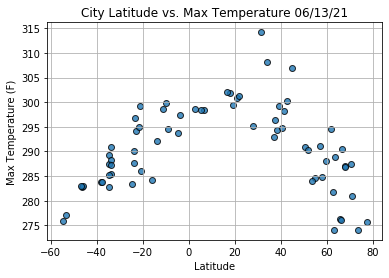

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [41]:
print(city_data_df)

    Cloudiness Country  Humidity      Lat       Lng  Max Temp  Wind Speed
0            0      PE        72 -13.7000  -76.2167    292.18        4.12
1            1      US        71  57.7900 -152.4072    284.88        3.60
2            0      CL        81 -53.1500  -70.9167    277.10        2.57
3           59      AU        82 -15.7667  128.7333    284.14        1.54
4           13      MX        64  27.9769 -114.0611    295.09        7.61
5           40      BR        60 -22.9661  -42.0278    294.07        2.06
6           75      CK        61 -21.2078 -159.7750    299.18        4.12
7           40      US        72  20.8947 -156.4700    300.91       10.29
8           68      AR        44 -34.6177  -68.3301    289.36        4.33
9          100      IE        94  55.1333   -7.4500    284.60        4.14
10          75      AR        81 -54.8000  -68.3000    275.96       10.29
11          20      US        76  39.1582  -75.5244    299.29        3.60
12           0      BR        82 -24.7

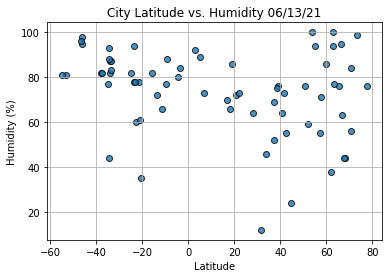

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

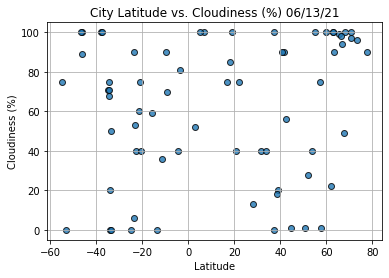

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

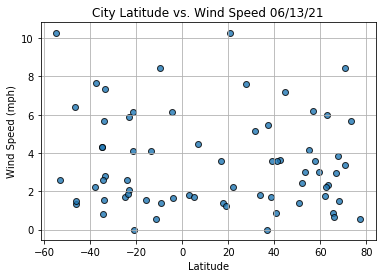

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()